# 10 Minutes to pandas

Course at http://pandas.pydata.org/pandas-docs/stable/10min.html

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Object creation

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.719670,0.473583,-0.516408,-0.946841
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962
2013-01-03,1.354872,0.109166,-0.100387,0.880606
2013-01-04,0.026815,1.190879,0.117612,-0.342757
2013-01-05,1.161087,0.062202,-0.800665,-1.613748
2013-01-06,0.792103,1.580373,0.680150,0.534644


In [6]:
df2 = pd.DataFrame({
        'A' : 1.,
        'B' : pd.Timestamp('20130102'),
        'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
        'D' : np.array([3] * 4,dtype='int32'),
        'E' : pd.Categorical(["test","train","test","train"]),
        'F' : 'foo'
    })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.719670,0.473583,-0.516408,-0.946841
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962
2013-01-03,1.354872,0.109166,-0.100387,0.880606
2013-01-04,0.026815,1.190879,0.117612,-0.342757
2013-01-05,1.161087,0.062202,-0.800665,-1.613748


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,0.026815,1.190879,0.117612,-0.342757
2013-01-05,1.161087,0.062202,-0.800665,-1.613748
2013-01-06,0.792103,1.580373,0.680150,0.534644


In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[-0.71967008,  0.47358271, -0.51640836, -0.94684148],
       [-0.5098214 ,  1.16228753, -1.46022542, -2.12796225],
       [ 1.35487188,  0.1091661 , -0.10038748,  0.88060646],
       [ 0.02681507,  1.19087873,  0.11761214, -0.34275693],
       [ 1.16108685,  0.06220205, -0.80066491, -1.61374847],
       [ 0.79210304,  1.58037257,  0.68015029,  0.53464355]])

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.350898,0.763082,-0.346654,-0.602677
std,0.877612,0.634506,0.749066,1.185613
min,-0.719670,0.062202,-1.460225,-2.127962
25%,-0.375662,0.200270,-0.729601,-1.447022
50%,0.409459,0.817935,-0.308398,-0.644799
75%,1.068841,1.183731,0.063112,0.315293
max,1.354872,1.580373,0.680150,0.880606


In [14]:
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.719670,-0.509821,1.354872,0.026815,1.161087,0.792103
B,0.473583,1.162288,0.109166,1.190879,0.062202,1.580373
C,-0.516408,-1.460225,-0.100387,0.117612,-0.800665,0.680150
D,-0.946841,-2.127962,0.880606,-0.342757,-1.613748,0.534644


In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.946841,-0.516408,0.473583,-0.719670
2013-01-02,-2.127962,-1.460225,1.162288,-0.509821
2013-01-03,0.880606,-0.100387,0.109166,1.354872
2013-01-04,-0.342757,0.117612,1.190879,0.026815
2013-01-05,-1.613748,-0.800665,0.062202,1.161087
2013-01-06,0.534644,0.680150,1.580373,0.792103


In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-05,1.161087,0.062202,-0.800665,-1.613748
2013-01-03,1.354872,0.109166,-0.100387,0.880606
2013-01-01,-0.719670,0.473583,-0.516408,-0.946841
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962
2013-01-04,0.026815,1.190879,0.117612,-0.342757
2013-01-06,0.792103,1.580373,0.680150,0.534644


## Selection

In [17]:
df['A']

2013-01-01   -0.719670
2013-01-02   -0.509821
2013-01-03    1.354872
2013-01-04    0.026815
2013-01-05    1.161087
2013-01-06    0.792103
Freq: D, Name: A, dtype: float64

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.719670,0.473583,-0.516408,-0.946841
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962
2013-01-03,1.354872,0.109166,-0.100387,0.880606


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962
2013-01-03,1.354872,0.109166,-0.100387,0.880606
2013-01-04,0.026815,1.190879,0.117612,-0.342757


### Selection by label: `loc[]` & `at[]`

In [20]:
df.loc[dates[0]]

A   -0.719670
B    0.473583
C   -0.516408
D   -0.946841
Name: 2013-01-01 00:00:00, dtype: float64

In [21]:
df.loc['20130102':'20130104',['A','B']] ## Includes endpoints

,A,B
2013-01-02,-0.509821,1.162288
2013-01-03,1.354872,0.109166
2013-01-04,0.026815,1.190879


In [22]:
df.at[dates[0],'A'] # Equivalent of df.loc[dates[0],'A']

-0.71967008350283379

### Selection by position: `iloc[]` & `iat[]`

In [23]:
df.iloc[3]

A    0.026815
B    1.190879
C    0.117612
D   -0.342757
Name: 2013-01-04 00:00:00, dtype: float64

In [24]:
df.iloc[3:5,0:2] # Excludes endpoints

,A,B
2013-01-04,0.026815,1.190879
2013-01-05,1.161087,0.062202


In [25]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.509821,-1.460225
2013-01-03,1.354872,-0.100387
2013-01-05,1.161087,-0.800665


In [26]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.473583,-0.516408
2013-01-02,1.162288,-1.460225
2013-01-03,0.109166,-0.100387
2013-01-04,1.190879,0.117612
2013-01-05,0.062202,-0.800665
2013-01-06,1.580373,0.680150


In [27]:
df.iat[1,1] # Equivalent of df.iloc[1,1]

1.1622875320130426

### Boolean indexing (i.e. filtering)

In [28]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.473583,NaN,NaN
2013-01-02,NaN,1.162288,NaN,NaN
2013-01-03,1.354872,0.109166,NaN,0.880606
2013-01-04,0.026815,1.190879,0.117612,NaN
2013-01-05,1.161087,0.062202,NaN,NaN
2013-01-06,0.792103,1.580373,0.680150,0.534644


In [29]:
df2 = df.copy()

In [30]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.719670,0.473583,-0.516408,-0.946841,one
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962,one
2013-01-03,1.354872,0.109166,-0.100387,0.880606,two
2013-01-04,0.026815,1.190879,0.117612,-0.342757,three
2013-01-05,1.161087,0.062202,-0.800665,-1.613748,four
2013-01-06,0.792103,1.580373,0.680150,0.534644,three


In [31]:
df2[df2['E'].isin(['two','four'])] # Useful for OR queries

,A,B,C,D,E
2013-01-03,1.354872,0.109166,-0.100387,0.880606,two
2013-01-05,1.161087,0.062202,-0.800665,-1.613748,four


### Setting

In [32]:
## Create timeseries starting at 20130102 (second day)
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
## Adding df: will follow index
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.719670,0.473583,-0.516408,-0.946841,NaN
2013-01-02,-0.509821,1.162288,-1.460225,-2.127962,1.0
2013-01-03,1.354872,0.109166,-0.100387,0.880606,2.0
2013-01-04,0.026815,1.190879,0.117612,-0.342757,3.0
2013-01-05,1.161087,0.062202,-0.800665,-1.613748,4.0
2013-01-06,0.792103,1.580373,0.680150,0.534644,5.0


In [33]:
df.at[dates[0],'A'] = 0 # Setting by label
df.iat[0,1] = 2 # Setting by position
df.loc[:,'D'] = np.array([5] * len(df)) # Setting an array
df

,A,B,C,D,F
2013-01-01,0.000000,2.000000,-0.516408,5,NaN
2013-01-02,-0.509821,1.162288,-1.460225,5,1.0
2013-01-03,1.354872,0.109166,-0.100387,5,2.0
2013-01-04,0.026815,1.190879,0.117612,5,3.0
2013-01-05,1.161087,0.062202,-0.800665,5,4.0
2013-01-06,0.792103,1.580373,0.680150,5,5.0


In [34]:
df2 = df.copy()
df2[df2 > 0] = -df2 # Set negative value
df2

,A,B,C,D,F
2013-01-01,0.000000,-2.000000,-0.516408,-5,NaN
2013-01-02,-0.509821,-1.162288,-1.460225,-5,-1.0
2013-01-03,-1.354872,-0.109166,-0.100387,-5,-2.0
2013-01-04,-0.026815,-1.190879,-0.117612,-5,-3.0
2013-01-05,-1.161087,-0.062202,-0.800665,-5,-4.0
2013-01-06,-0.792103,-1.580373,-0.680150,-5,-5.0


## Missing data

In [35]:
# Reindex: change, add, delete on an axis => returns copy
df1 = df.reindex(index=dates[0:4], columns=list(df.columns))
df1

,A,B,C,D,F
2013-01-01,0.000000,2.000000,-0.516408,5,NaN
2013-01-02,-0.509821,1.162288,-1.460225,5,1.0
2013-01-03,1.354872,0.109166,-0.100387,5,2.0
2013-01-04,0.026815,1.190879,0.117612,5,3.0


In [36]:
df1.dropna(how='any')

,A,B,C,D,F
2013-01-02,-0.509821,1.162288,-1.460225,5,1.0
2013-01-03,1.354872,0.109166,-0.100387,5,2.0
2013-01-04,0.026815,1.190879,0.117612,5,3.0


In [37]:
df1.fillna(value=5)

,A,B,C,D,F
2013-01-01,0.000000,2.000000,-0.516408,5,5.0
2013-01-02,-0.509821,1.162288,-1.460225,5,1.0
2013-01-03,1.354872,0.109166,-0.100387,5,2.0
2013-01-04,0.026815,1.190879,0.117612,5,3.0


In [38]:
pd.isnull(df1) # Boolean mask

,A,B,C,D,F
2013-01-01,False,False,False,False,True
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,False
2013-01-04,False,False,False,False,False


## Operations

### Stats

In [39]:
df.mean()

A    0.470843
B    1.017484
C   -0.346654
D    5.000000
F    3.000000
dtype: float64

In [40]:
df.mean(1) # Along other axis

2013-01-01    1.620898
2013-01-02    1.038448
2013-01-03    1.672730
2013-01-04    1.867061
2013-01-05    1.884525
2013-01-06    2.610525
Freq: D, dtype: float64

### Apply

In [41]:
df.apply(np.cumsum) # On column D

,A,B,C,D,F
2013-01-01,0.000000,2.000000,-0.516408,5,NaN
2013-01-02,-0.509821,3.162288,-1.976634,10,1.0
2013-01-03,0.845050,3.271454,-2.077021,15,3.0
2013-01-04,0.871866,4.462332,-1.959409,20,6.0
2013-01-05,2.032952,4.524534,-2.760074,25,10.0
2013-01-06,2.825055,6.104907,-2.079924,30,15.0


In [42]:
df.apply(lambda x: x.max() - x.min())

A    1.864693
B    1.937798
C    2.140376
D    0.000000
F    4.000000
dtype: float64

### Histogramming

In [43]:
s = pd.Series(np.random.randint(0,7, size=10))
s

0    4
1    2
2    2
3    3
4    2
5    1
6    3
7    2
8    4
9    5
dtype: int64

In [44]:
s.value_counts()

2    4
4    2
3    2
5    1
1    1
dtype: int64

### String methods

In [45]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

### Concat

In [46]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,1.112288,-2.512091,1.520384,-1.131405
1,0.211688,0.809184,1.741552,0.672162
2,-0.387200,-0.231854,0.003074,0.235904
3,1.129520,0.430396,-0.182894,-0.142273
4,-0.189270,-0.994973,1.206054,-0.673523
5,-0.727499,0.877517,0.144198,-0.324074
6,-1.694456,1.729998,1.211304,1.355644
7,-0.438307,-0.290887,1.638899,-1.508581
8,-0.900840,-0.098302,-0.471238,-1.702010
9,-1.786905,2.138903,-0.342398,0.258581


In [47]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.112288,-2.512091,1.520384,-1.131405
1,0.211688,0.809184,1.741552,0.672162
2,-0.387200,-0.231854,0.003074,0.235904
3,1.129520,0.430396,-0.182894,-0.142273
4,-0.189270,-0.994973,1.206054,-0.673523
5,-0.727499,0.877517,0.144198,-0.324074
6,-1.694456,1.729998,1.211304,1.355644
7,-0.438307,-0.290887,1.638899,-1.508581
8,-0.900840,-0.098302,-0.471238,-1.702010
9,-1.786905,2.138903,-0.342398,0.258581


### Join

In [48]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [49]:
left

,key,lval
0,foo,1
1,foo,2


In [50]:
right

,key,rval
0,foo,4
1,foo,5


In [51]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


### Append

In [52]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,0.280080,0.746444,0.266558,0.833918
1,-0.474184,-0.142246,1.048087,-0.472262
2,-2.122560,-0.288849,-0.809552,2.313706
3,-0.047121,0.411970,-0.095425,0.345191
4,-0.125504,1.105362,2.724604,1.811016
5,0.460798,1.737140,0.608377,-0.366596
6,0.225538,0.478967,1.563322,-1.018870
7,0.090289,-0.449488,0.260246,-0.072380


In [53]:
s = df.iloc[3]
s

A   -0.047121
B    0.411970
C   -0.095425
D    0.345191
Name: 3, dtype: float64

In [54]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.280080,0.746444,0.266558,0.833918
1,-0.474184,-0.142246,1.048087,-0.472262
2,-2.122560,-0.288849,-0.809552,2.313706
3,-0.047121,0.411970,-0.095425,0.345191
4,-0.125504,1.105362,2.724604,1.811016
5,0.460798,1.737140,0.608377,-0.366596
6,0.225538,0.478967,1.563322,-1.018870
7,0.090289,-0.449488,0.260246,-0.072380
8,-0.047121,0.411970,-0.095425,0.345191


## Grouping

In [55]:
df = pd.DataFrame({
        'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
        'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
        'C' : np.random.randn(8),
        'D' : np.random.randn(8)
    })
df

,A,B,C,D
0,foo,one,0.012486,0.577804
1,bar,one,-0.779918,-0.469925
2,foo,two,0.205781,-0.635293
3,bar,three,0.173921,-0.710203
4,foo,two,0.817729,-0.912674
5,bar,two,-0.251107,-0.862881
6,foo,one,-0.566876,1.463314
7,foo,three,-0.199867,0.873453


In [56]:
df.groupby('A').sum()

,C,D
A,,
bar,-0.857103,-2.043009
foo,0.269253,1.366604


In [57]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.779918 -0.469925
    three  0.173921 -0.710203
    two   -0.251107 -0.862881
foo one   -0.554390  2.041119
    three -0.199867  0.873453
    two    1.023510 -1.547968

## Reshaping

### Stack

In [58]:
tuples = list(zip(*[
            ['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
            ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']
        ]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.350193 -0.760953
      two    -1.135070 -1.223456
baz   one     0.188609 -0.084714
      two     0.650017  1.391341

In [59]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.350193
               B   -0.760953
       two     A   -1.135070
               B   -1.223456
baz    one     A    0.188609
               B   -0.084714
       two     A    0.650017
               B    1.391341
dtype: float64

In [60]:
stacked.unstack()

A         B
first second                    
bar   one    -0.350193 -0.760953
      two    -1.135070 -1.223456
baz   one     0.188609 -0.084714
      two     0.650017  1.391341

### Pivot tables

In [61]:
df = pd.DataFrame({
        'A' : ['one', 'one', 'two', 'three'] * 3,
        'B' : ['A', 'B', 'C'] * 4,
        'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
        'D' : np.random.randn(12),
        'E' : np.random.randn(12)
    })
df

,A,B,C,D,E
0,one,A,foo,0.197604,0.550855
1,one,B,foo,1.713386,-0.915005
2,two,C,foo,-0.026266,-0.289674
3,three,A,bar,0.003839,-1.182743
4,one,B,bar,-2.301463,0.796843
5,one,C,bar,0.228339,-1.888911
6,two,A,foo,1.930401,1.893935
7,three,B,foo,-0.545502,0.927461
8,one,C,foo,-0.622273,0.398327
9,one,A,bar,0.745438,-0.856716


In [62]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.745438  0.197604
      B -2.301463  1.713386
      C  0.228339 -0.622273
three A  0.003839       NaN
      B       NaN -0.545502
      C -1.960255       NaN
two   A       NaN  1.930401
      B -0.253545       NaN
      C       NaN -0.026266

## Time series

In [63]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.head()

2012-01-01 00:00:00    180
2012-01-01 00:00:01    281
2012-01-01 00:00:02     58
2012-01-01 00:00:03    423
2012-01-01 00:00:04    297
Freq: S, dtype: int64

In [64]:
ts.resample('5Min').sum()

2012-01-01    24398
Freq: 5T, dtype: int64

In [65]:
ts_utc = ts.tz_localize('UTC')
ts_utc.head()

2012-01-01 00:00:00+00:00    180
2012-01-01 00:00:01+00:00    281
2012-01-01 00:00:02+00:00     58
2012-01-01 00:00:03+00:00    423
2012-01-01 00:00:04+00:00    297
Freq: S, dtype: int64

In [66]:
ts_utc.tz_convert('US/Eastern').head()

2011-12-31 19:00:00-05:00    180
2011-12-31 19:00:01-05:00    281
2011-12-31 19:00:02-05:00     58
2011-12-31 19:00:03-05:00    423
2011-12-31 19:00:04-05:00    297
Freq: S, dtype: int64

In [67]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    2.353952
2012-02-29   -0.025772
2012-03-31    0.030829
2012-04-30   -0.579900
2012-05-31   -0.374846
Freq: M, dtype: float64

In [68]:
ps = ts.to_period()
ps

2012-01    2.353952
2012-02   -0.025772
2012-03    0.030829
2012-04   -0.579900
2012-05   -0.374846
Freq: M, dtype: float64

## Categoricals

In [69]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [70]:
df['grade'] = df['raw_grade'].astype('category')
df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [71]:
# More meaningful names, in place
df['grade'].cat.categories = ['very good', 'good', 'very bad']

In [72]:
# Map to whole range of categories
df['grade'] = df['grade'].cat.set_categories(['very bad', 'bad', 'medium', 'good', 'very good'])
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [73]:
df.sort_values(by='grade') # Sorted by category order, not alphabetical

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [74]:
df.groupby('grade').size() # Also includes empty categories

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

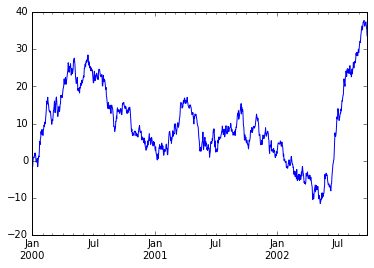

In [75]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

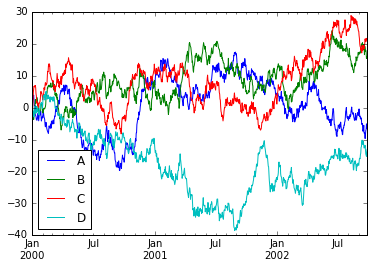

In [76]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

## Getting data

### CSV

In [77]:
df.to_csv('foo.csv')

In [78]:
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.088584,-1.261431,0.657535,-0.760974
1,2000-01-02,2.418845,-0.525023,-0.124721,-1.181186
2,2000-01-03,2.910594,-2.020437,1.995583,-1.050503
3,2000-01-04,3.089578,-2.515656,4.832168,-2.436136
4,2000-01-05,3.931172,-3.709642,5.800091,-2.779565


### HDF5

In [79]:
df.to_hdf('foo.h5','df')

In [80]:
pd.read_hdf('foo.h5', 'df').head()

,A,B,C,D
2000-01-01,0.088584,-1.261431,0.657535,-0.760974
2000-01-02,2.418845,-0.525023,-0.124721,-1.181186
2000-01-03,2.910594,-2.020437,1.995583,-1.050503
2000-01-04,3.089578,-2.515656,4.832168,-2.436136
2000-01-05,3.931172,-3.709642,5.800091,-2.779565


### Excel

Make sure you the modules `openpyxl` and `xlrd`: `pip install openpyxl xlrd`

In [81]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [82]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA']).head()

,A,B,C,D
2000-01-01,0.088584,-1.261431,0.657535,-0.760974
2000-01-02,2.418845,-0.525023,-0.124721,-1.181186
2000-01-03,2.910594,-2.020437,1.995583,-1.050503
2000-01-04,3.089578,-2.515656,4.832168,-2.436136
2000-01-05,3.931172,-3.709642,5.800091,-2.779565
